In [1]:
username = "Alex"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
include(pathtorepo * "dynamical-systems\\system.jl")
include(pathtorepo * "dynamical-systems\\visual_regimes.jl");

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


In [2]:
using StaticArrays, DifferentialEquations, DynamicalSystems
E, x, y  = -40..40, -5..5,  -5..5
box = E × x × y
using CairoMakie, GLMakie
using LinearAlgebra

In [3]:
const τ = 0.013;  const τD = 0.07993;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58; const ΔU0 = 0.305; 

In [4]:
time = 1000; tt = 1000; tstep = 0.001; times = [time, tt]
integ_set = (alg = Vern9(), adaptive = false, dt = tstep);

In [5]:
I0 = -1.705008321066218; U0 = 0.2649038416928778;
p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0_1 = SA[8.054797242493304, 0.7437113804461553, 0.4383355523705589];

In [6]:
ds = CoupledODEs(TM, u0_1, p, diffeq = integ_set)

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  TM
 ODE solver:    Vern9
 ODE kwargs:    (adaptive = false, dt = 0.001)
 parameters:    [1.58, 0.013, 0.07993, 3.3, 3.07, 0.75, 0.4, 0.2649038416928778, 0.305, 0.3, -1.705008321066218]
 time:          0.0
 state:         [8.054797242493304, 0.7437113804461553, 0.4383355523705589]


In [7]:
lyapunovspectrum(ds, 1000)

3-element Vector{Float64}:
  0.5603248988185557
  0.0004590755997564827
 -3.945975801836368

In [8]:
fp, ei, _ = fixedpoints(ds, box, jacob_TM_);

In [9]:
Jac = jacob_TM_(fp[1], p, 0)
eivecs = eigvecs(Jac)
shift = real(eivecs[:, 1])*1e-7 + fp[1]

3-element SVector{3, Float64} with indices SOneTo(3):
 8.347025483177607
 0.7384963532723428
 0.4383068344723806

In [122]:
prob_for = ODEProblem(TM, SA[4.067018006482408, 0.8136658949123097, 0.44546502139512467], (0.0, 1000), p)
sol_for = solve(prob_for, alg = Vern9(), adaptive = false, dt = 0.001); 

In [123]:
println("Length: $(length(sol_for))")
println("Last point: $(sol_for[end])")

Length: 1000002
Last point: [8.531509024339876, 0.7272441201539678, 0.4371551775800116]


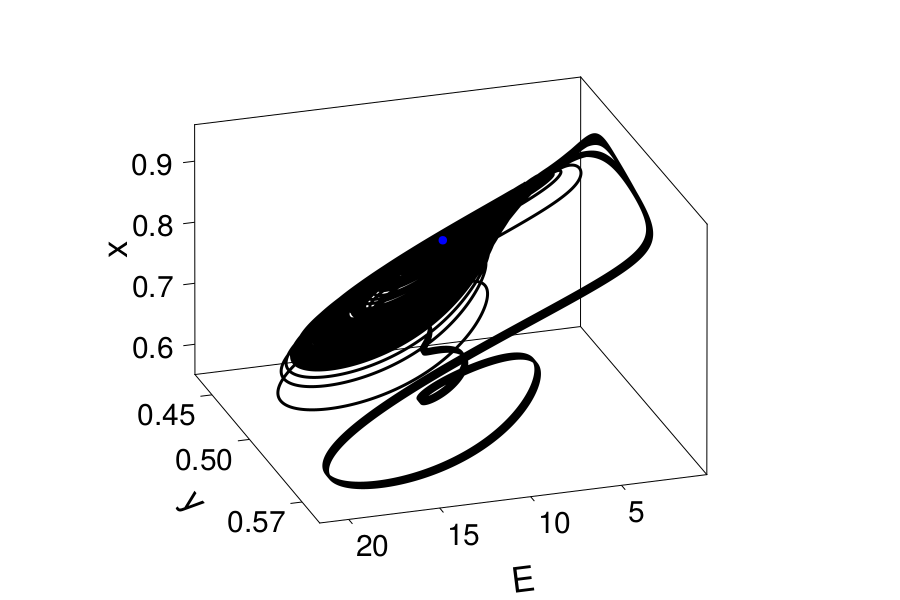

CairoMakie.Screen{IMAGE}


In [124]:
ts, tf = 200000, 400000
idx, idy, idz = 1, 3, 2
lb_size = 35; tck_size = 30;
dis  = 60;

CairoMakie.activate!()
f = Figure(resolution = (900, 600))
ax = Axis3(f[1, 1], azimuth = 0.4pi,
            xlabel = "E", ylabel = "y", zlabel = "x",
            xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, zgridvisible = false,
            protrusions = dis, xlabeloffset = dis, ylabeloffset = dis, zlabeloffset = dis,
            yticks = [0.45, 0.50, 0.57])

#ax = LScene(f[1, 1])
#scale!(ax.scene, 1, 50, 50)

lines!(sol_for[idx,ts:tf], sol_for[idy,ts:tf], sol_for[idz,ts:tf],
    linewidth = 3.0, color = :black)

for (i, ep) in enumerate(fp)
    scatter!(ep[idx], ep[idy], ep[idz], color = :blue, markersize = 12)
end

display(f)

In [39]:
#save("C:\\Users\\Alex\\Desktop\\chaotic_homoclinic_phase.eps", f)

CairoMakie.Screen{EPS}


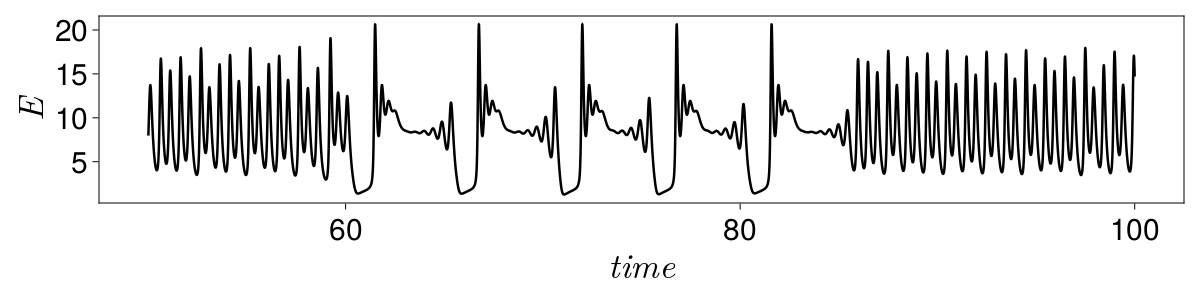

In [144]:
ts, tf = 50000, 100000
f = Figure(resolution = (1200, 300))
axis = Axis(f[1, 1], xlabel = L"$time$", ylabel = L"$E$",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false)
lines!(axis, sol_for.t[ts:tf], sol_for[1, ts:tf], linewidth = 2.5, color = :black)
f

In [145]:
save("C:\\Users\\Alex\\Desktop\\chaotic_homoclinic_timeseries.eps", f)

CairoMakie.Screen{EPS}
